Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/02_Clustering'
except ImportError as e:
    pass

## Exercise 8: Cluster Analysis

### 8.1. Analyzing the Customer Data Set

#### 8.1.1 Load the customers dataset from the Excel file provided in ILIAS.
Load the excel file into a dataframe and inspect the first few records.
Remember to import the pandas package first! Then, call the ```read_excel()``` function to load the file.

In [169]:
# import pandas
import pandas as pd

# load the file using the read_excel() function

df = pd.read_excel('Customer.xls')

# show the first few records
df.head(13)

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
1,5,42,18,5,2764
2,6,50,0,1,1343
3,8,13,12,4,2435
4,9,10,7,3,2435
5,10,34,17,6,2896
6,11,40,20,8,2869
7,12,40,8,2,1236
8,14,9,9,8,2435
9,15,36,7,2,1764


#### 8.1.2 Cluster the dataset using K-Means clustering. 

8.1.2.1. Experiment with different K values. Which values do make sense? 

8.1.2.2. What does the clustering tell you concerning your product portfolio? 

8.1.2.3. What does the clustering tell you concerning your marketing efforts in different regions?

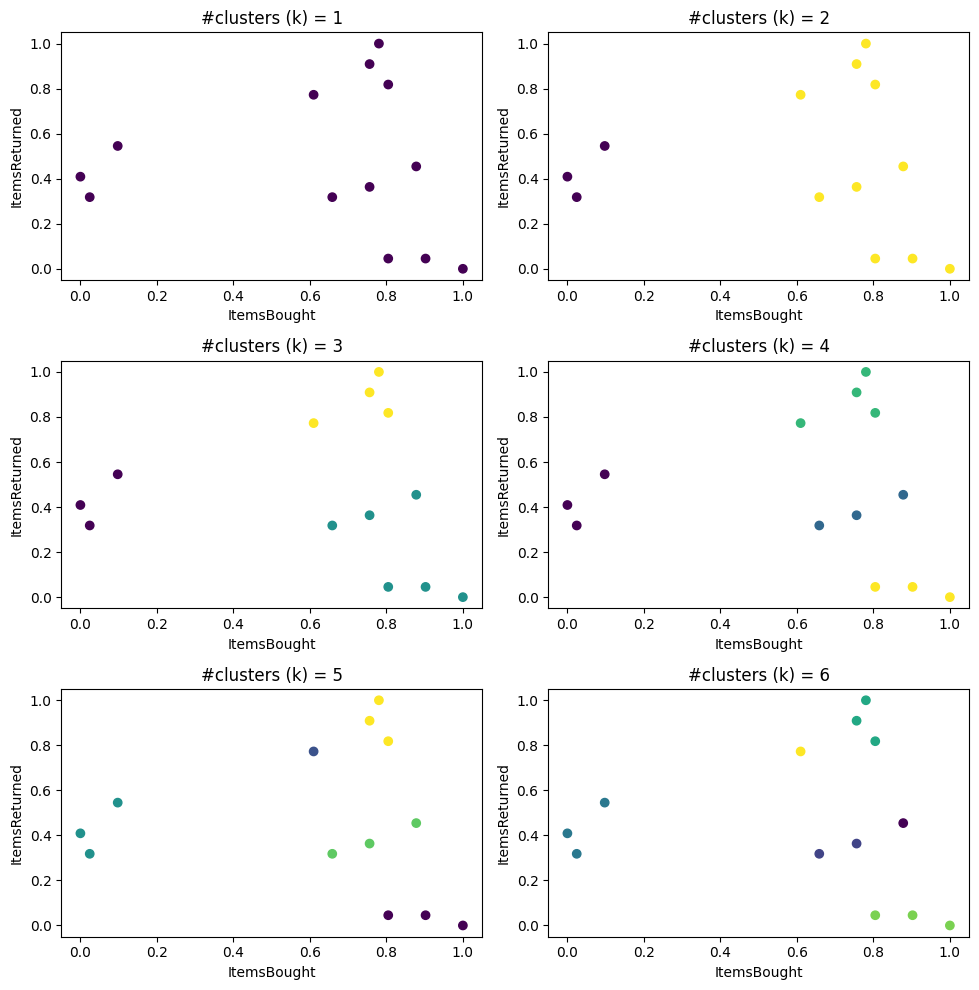

In [170]:
#matplotlib
import matplotlib.pyplot as plt
#import kmeans
from sklearn.cluster import KMeans

# import preprocessing
from sklearn import preprocessing

#create the normaliser
scaler = preprocessing.MinMaxScaler()

# copy the dataframe before preprocessing
preprocessed = df.copy()

# preprocessing the dataset 
preprocessed[['ItemsBought','ItemsReturned']] = scaler.fit_transform(preprocessed[['ItemsBought','ItemsReturned']])

#setup a figure
plt.figure(figsize = (10,10))


for k in range (1,7):
    estimator = KMeans(n_clusters=k, init= 'k-means++', random_state=42, max_iter= 300)
    cluster_ids = estimator.fit_predict(preprocessed[['ItemsBought','ItemsReturned']])

    #add a subplot
    plt.subplot(3,2,k)

    #automatically adjust subplot parameters so the subplots fits in to the figure area
    plt.tight_layout()    

    #setup the labels of the subplots
    plt.title('#clusters (k) = {}'.format(k))
    plt.xlabel('ItemsBought')
    plt.ylabel('ItemsReturned')

    #create the scatter plot
    plt.scatter(preprocessed['ItemsBought'],preprocessed['ItemsReturned'], c = cluster_ids)

plt.show();



import warnings
warnings.simplefilter('ignore');

In [171]:
preprocessed.head()

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,0.878049,0.454545,2,1365
1,5,0.804878,0.818182,5,2764
2,6,1.000000,0.000000,1,1343
3,8,0.097561,0.545455,4,2435
4,9,0.024390,0.318182,3,2435


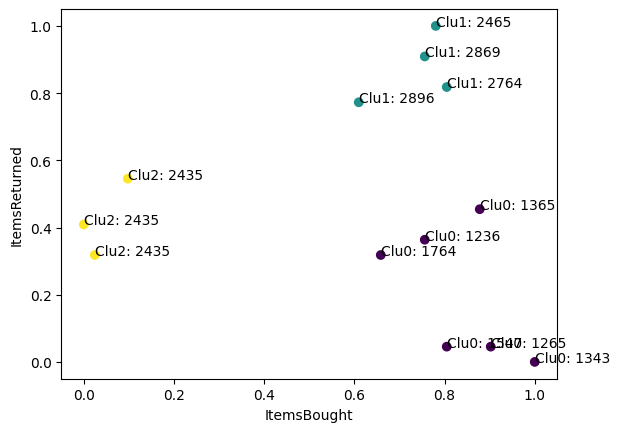

In [172]:
# 8.1.2.2. What does the clustering tell you concerning your product portfolio? 

#create the cluster for k = 3
estimator = KMeans(n_clusters=3)

# create the clustering
cluster_ids = estimator.fit_predict(preprocessed[['ItemsBought','ItemsReturned']])

# create the scatter plot
plt.scatter(preprocessed['ItemsBought'], preprocessed['ItemsReturned'], c=cluster_ids)

# annotate each data point with its product and cluster_id
for index, c_id, bought, returned, zip_code, product in preprocessed.itertuples():
    plt.annotate("Clu{}: {}".format(cluster_ids[index], product), (bought, returned))

# axis labels
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')

plt.show()


In [173]:
preprocessed.head()

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,0.878049,0.454545,2,1365
1,5,0.804878,0.818182,5,2764
2,6,1.000000,0.000000,1,1343
3,8,0.097561,0.545455,4,2435
4,9,0.024390,0.318182,3,2435


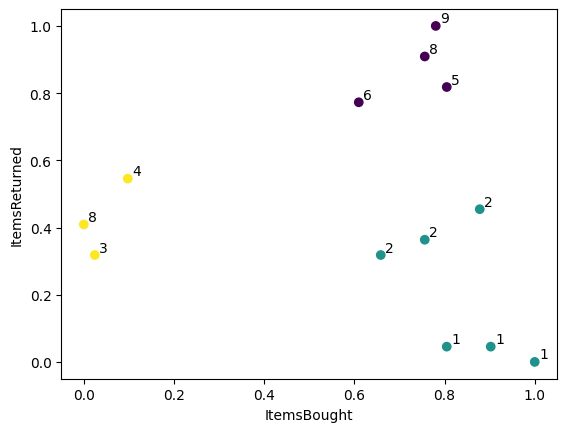

In [174]:
#8.1.2.3. What does the clustering tell you concerning your marketing efforts in different regions?

#create the cluster for k = 3
estimator = KMeans(n_clusters=3)

# create the clustering
cluster_ids = estimator.fit_predict(preprocessed[['ItemsBought','ItemsReturned']])

# create the scatter plot
plt.scatter(preprocessed['ItemsBought'], preprocessed['ItemsReturned'], c=cluster_ids)

# annotate each data point with its product and cluster_id
for index, c_id, bought, returned, zip_code, product in preprocessed.itertuples():
    plt.annotate(zip_code,(bought + 0.01, returned + 0.01))

# axis labels
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')

plt.show()


#### 8.1.3 Cluster the data set using Agglomerative Hierarchical Clustering. What does the dendrogram tell you concerning your customer groups?

To plot a dendrogram, we need to use the ```linkage()``` function from scipy instead of the clusterer from scikit-learn.
After creating the clustering with the ```linkage()``` function, we can plot using the ```dendrogram()``` function

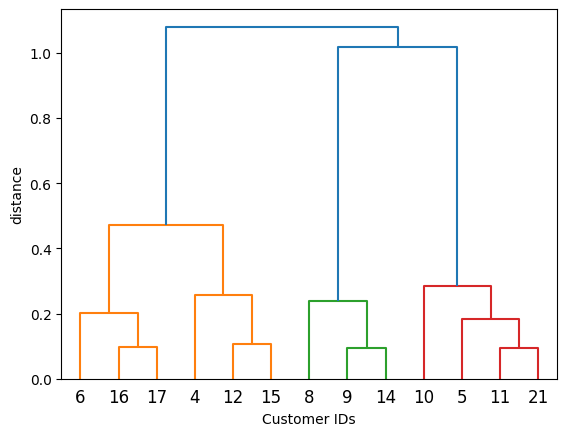

In [177]:
# import linkage and dendrogram from scipy

from scipy.cluster.hierarchy import dendrogram,linkage
# create the clustering
Z = linkage(preprocessed[['ItemsBought','ItemsReturned']], 'complete')

# plot the dendrogram
dendrogram(Z,labels = list(df['Customer ID']))

# setup the labels
plt.xlabel('Customer IDs')
plt.ylabel('distance')

# show the plot
plt.show()

Judging by the dendrogram, the customers in the "bad" group (IDs 8, 9 and 14) are far more different from the other customers than the customers in the "good" and "average" group (look at the Y axis).

#### 8.1.4 Flatten the hierarchical clustering so that you get 3 or 4 customer groups. Name these groups with appropriate labels.

To create a partitional clustering from a hierarchical clustering, we have to cut the hierarchy.
You can do this in the ```dendrogram()``` function using the ```truncate_mode``` parameter.
To create cluster ids as in KMeans, use the [```fcluster()``` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html).

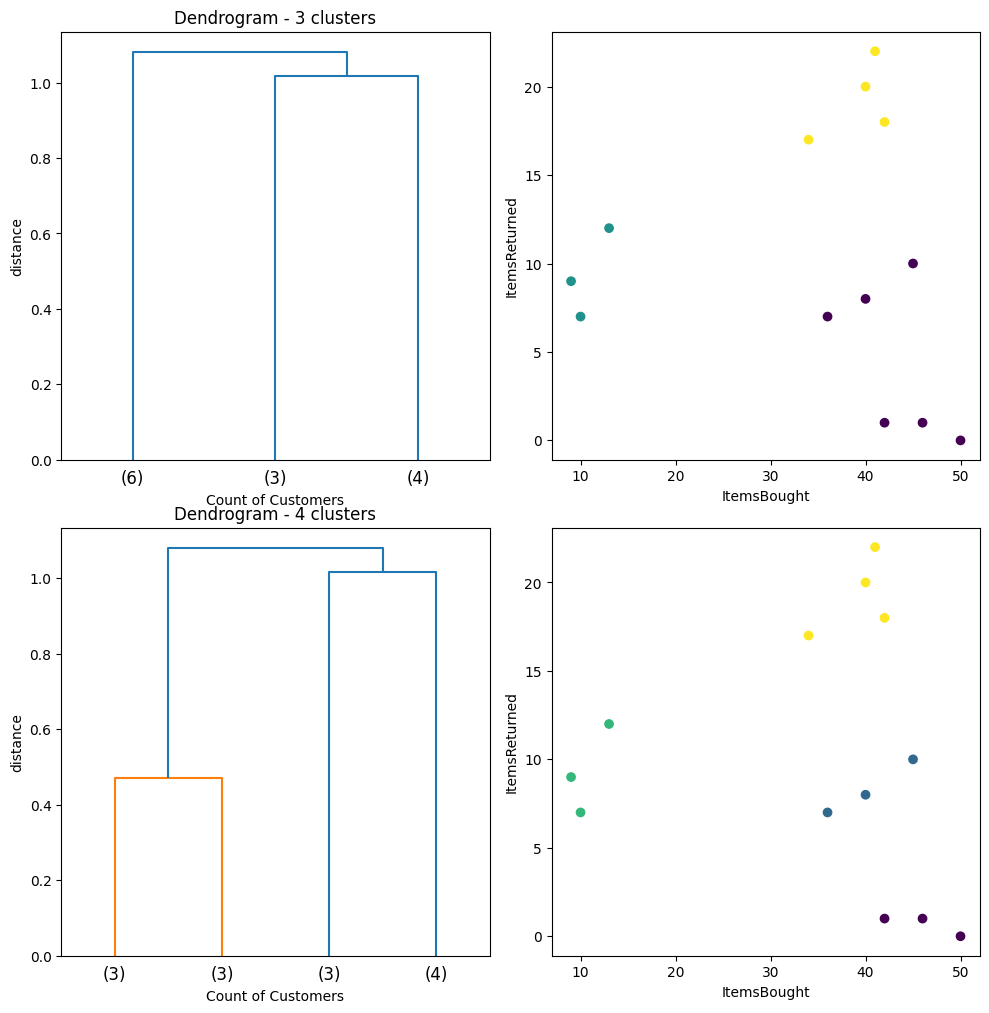

In [10]:
# import fcluster
from scipy.cluster.hierarchy import fcluster

# setup a figure
plt.figure(figsize=(10,10))

# iterate over the different numbers of clusters that we want to consider (here: 3 and 4)
counter = 1
for i in [3,4]:
    # add a sub plot
    plt.subplot(2,2,counter)
    counter += 1
    
    # setup the layout of the plot
    plt.tight_layout()
    plt.title('Dendrogram - {} clusters'.format(i))
    plt.xlabel('Count of Customers')
    plt.ylabel('distance')
    
    # plot the dendrogram
    dendrogram (Z, truncate_mode = 'lastp', p = i)
    
    # add a second sub plot
    plt.subplot(2,2,counter)
    counter += 1
    
    # create the clusters by cutting the hierarchy
    clusters = fcluster(Z, i, criterion = 'maxclust')
    
    # create a scatter plot coloured according to the clusteres
    plt.scatter(df['ItemsBought'],df['ItemsReturned'], c = clusters)
    
    # setup the plot labels
    plt.xlabel('ItemsBought')
    plt.ylabel('ItemsReturned')
    
# show the figure
plt.show();



Answer:

### 8.2. Analyzing the Students Data Set

#### 8.2.1. Aggregate the students data set by student and calculate the average mark and the average number of attended classes



In [11]:
# load the excel file into a dataframe
df2 = pd.read_excel('Student.xls')
display(df2.head())
display(df2.groupby('Name')[['Mark','Attended']].mean().reset_index())
df3 = df2.groupby('Name')[['Mark','Attended']].mean().reset_index()



,Semester,Name,Course,Mark,Attended
0,FSS2010,Alex Krausche,Database Systems I,1.3,13
1,FSS2010,Tanja Becker,Database Systems I,2.0,12
2,FSS2010,Mariano Selina,Database Systems I,1.7,5
3,FSS2010,Otto Blacher,Database Systems I,2.3,13
4,FSS2010,Frank Fester,Database Systems I,2.0,13


,Name,Mark,Attended
0,Alex Krausche,1.325000,12.500000
1,Avid Morvita,3.100000,11.333333
2,Frank Fester,2.200000,11.600000
3,Mariano Selina,1.680000,6.200000
4,Michaela Martke,3.660000,7.400000
5,Otto Blacher,2.260000,11.800000
6,Steve Queck,2.800000,8.333333
7,Susanne Müller,2.433333,12.000000
8,Tanja Becker,1.666667,12.000000
9,Ulrich Gester,4.400000,8.600000


#### 8.2.2 Cluster the data set using the K-Means algorithm. Does one attribute dominate the clustering? What can you do about this? Assign suitable labels to your clusters.

Run a KMeans clusterer on the data and plot it in a scatter plot. Its a good idea to annotate the data points with the names of the students.

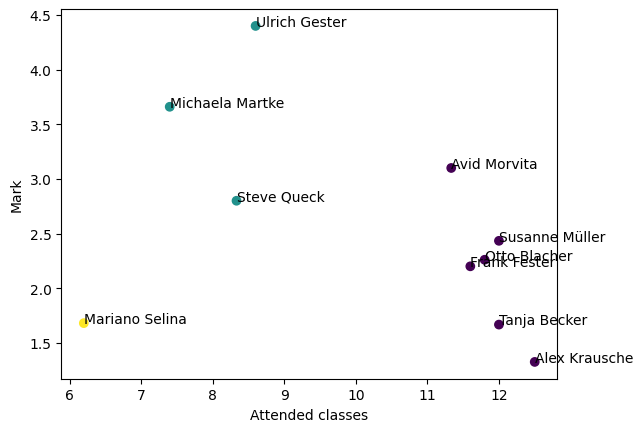

In [12]:
# create the clusterer
estimator = KMeans(n_clusters=3)

# create the clustering
label = estimator.fit_predict(df3[['Mark','Attended']])

# create the scatter plot
plt.scatter(df3['Attended'],df3['Mark'],c = label)

# setup the labels
plt.xlabel("Attended classes")
plt.ylabel("Mark")

# annotate each data point with the name of the student

# annotate each data point with its product and cluster_id
for index, Name, Mark, Attended in df3.itertuples():
    plt.annotate(Name,(Attended,Mark))


# show the figure
plt.show()

Answer:

- clustering is dominated by the number of average attended classes
- Avoid by normalizing to the data range of marks [1..5] or normalize b/w [0..1]
- There are 3 group of students
    - Students attending often and getting good marks(good students)
    - students attending almost never and getting bad marks (bad students)
    - student attending seldom and getting good marks (high-flyer)

,Name,Mark,Attended
0,Alex Krausche,0.000000,1.000000
1,Avid Morvita,0.577236,0.814815
2,Frank Fester,0.284553,0.857143
3,Mariano Selina,0.115447,0.000000
4,Michaela Martke,0.759350,0.190476


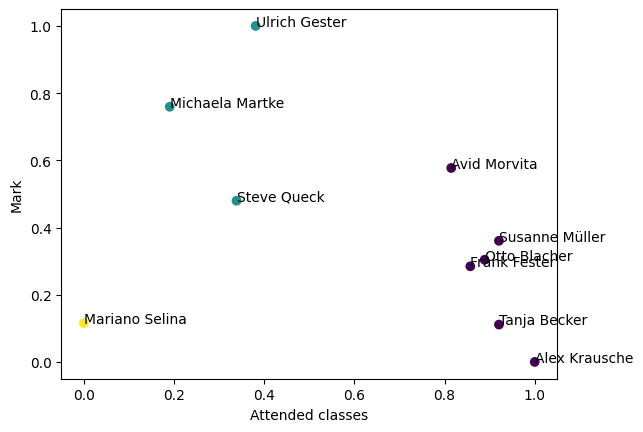

In [13]:
# noramlising the dataset
min_max_scaler = preprocessing.MinMaxScaler()
df3[['Mark','Attended']] = min_max_scaler.fit_transform(df3[['Mark','Attended']])
display(df3.head())
# create the clusterer
estimator = KMeans(n_clusters=3)

# create the clustering
label = estimator.fit_predict(df3[['Mark','Attended']])

# create the scatter plot
plt.scatter(df3['Attended'],df3['Mark'],c = label)

# setup the labels
plt.xlabel("Attended classes")
plt.ylabel("Mark")

# annotate each data point with the name of the student

# annotate each data point with its product and cluster_id
for index, Name, Mark, Attended in df3.itertuples():
    plt.annotate(Name,(Attended,Mark))


# show the figure
plt.show()

#### 8.2.3. Cluster the data set using Agglomerative Hierarchical Clustering. Experiment with different settings for calculating the cluster similarity. What is a good setting?

We first define which settings we want to test (the different linkage modes) and then iterate over these values in a for loop.
Inside the loop, we create the clustering with the respective settings and plot the dendrogram.

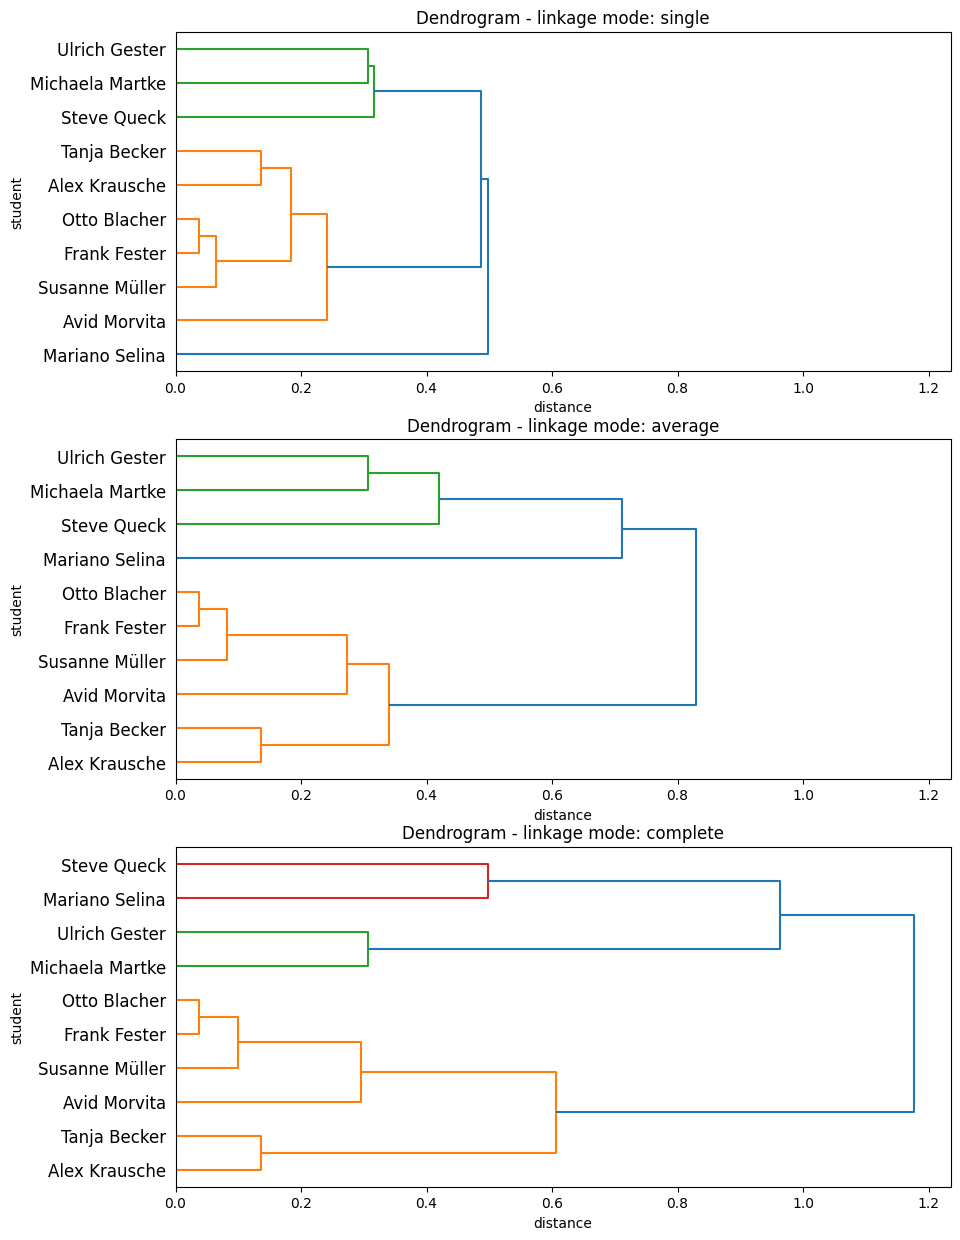

In [14]:
# define the different linkage modes that we want to test
modes = ['single', 'average', 'complete']

# create a figure
plt.figure(figsize=(10,15))
x_axis = None

# iterate over all linkage modes
for i, mode in enumerate(modes):
    
    # add a subplot 
    x_axis = plt.subplot(3,1,i + 1, sharex = x_axis)
    
    # setup the labels
    plt.title('Dendrogram - linkage mode: {}'.format(mode))
    plt.xlabel('distance')
    plt.ylabel('student')
    
    # create the clustering
    Z = linkage(df3[['Mark','Attended']], mode)
    
    # plot the dendrogram
    dendrogram(Z,labels = list(df3['Name']), orientation= 'right')

    
# show the plots
plt.show()

#### 8.2.4. What does the dendrogram tell you about the distances between the different groups of students?

Answer:
 -  Single link work best for this set of data. The outstanding "High flyer" student ID 3 is joined on top level with other clusters
 - Note: When trying to use 4 clusters SingleLink and AverageLink splitup 'badstudents' into different clusters. CompleteLink splits up the good students into "Very good" and "average student" which could be better clustering for this dataset. 

### 8.3. Clustering the Iris Data Set
#### 8.3. Cluster the Iris data set using different algorithms and parameter settings. Does it make sense to normalise the data before applying the algorithms? Try to choose an algorithm and parameter setting that reproduces the original division into the three different species.
Load the dataset as seen in the last exercise.

In [15]:
# load the file into a dataframe
iris = pd.read_csv('iris.csv')

# show the first few records
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Does it make sense to normalise the data before applying the algorithms?
Have a look at basic statistics of the dataset to check if you should apply normalisation.

In [16]:
# calculate statistics for the iris dataset
iris.describe()


,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Answer: The value ranges of the feature quite differ quite a bit ( min of 0.1 vs 4.3 and max 2.5 and 7.9), so normalisation make sense

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']] = scaler.fit_transform(iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']])

iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


Then we create clusterings with KMeans, Agglomerative Clustering and DBSCAN using different parameter settings. We compare the results using plots.

As we know the correct assignment from the dataset, we can calculate the overlap between clusters and the types of flowers.
For this calculattion, we add the cluster ids to the dataframe (using the ```join()``` function) and then group by the name of the flower and the cluster id.
Using the ```size()``` function, we get the number of records in each of these groups, which corresponds to the overlap of the cluster with the respective flower type.

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

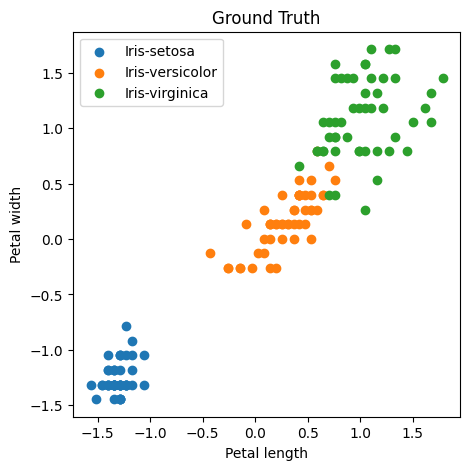

Name             KMeans
Iris-setosa      0         50
Iris-versicolor  1         48
                 2          2
Iris-virginica   1          4
                 2         46
dtype: int64

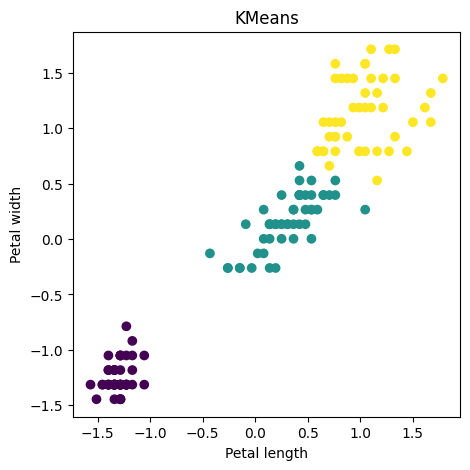

Name             DBSCAN
Iris-setosa      0         50
Iris-versicolor  1         50
Iris-virginica   1         50
dtype: int64

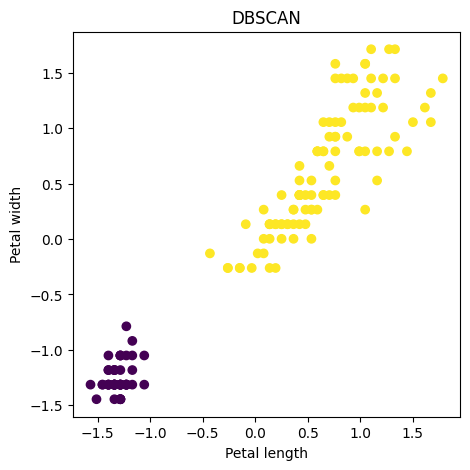

Name             single
Iris-setosa      1         50
Iris-versicolor  0         50
Iris-virginica   0         49
                 2          1
dtype: int64

Name             average
Iris-setosa      1          50
Iris-versicolor  0          49
                 2           1
Iris-virginica   0           2
                 2          48
dtype: int64

Name             complete
Iris-setosa      2           50
Iris-versicolor  0           25
                 1           25
Iris-virginica   0           50
dtype: int64

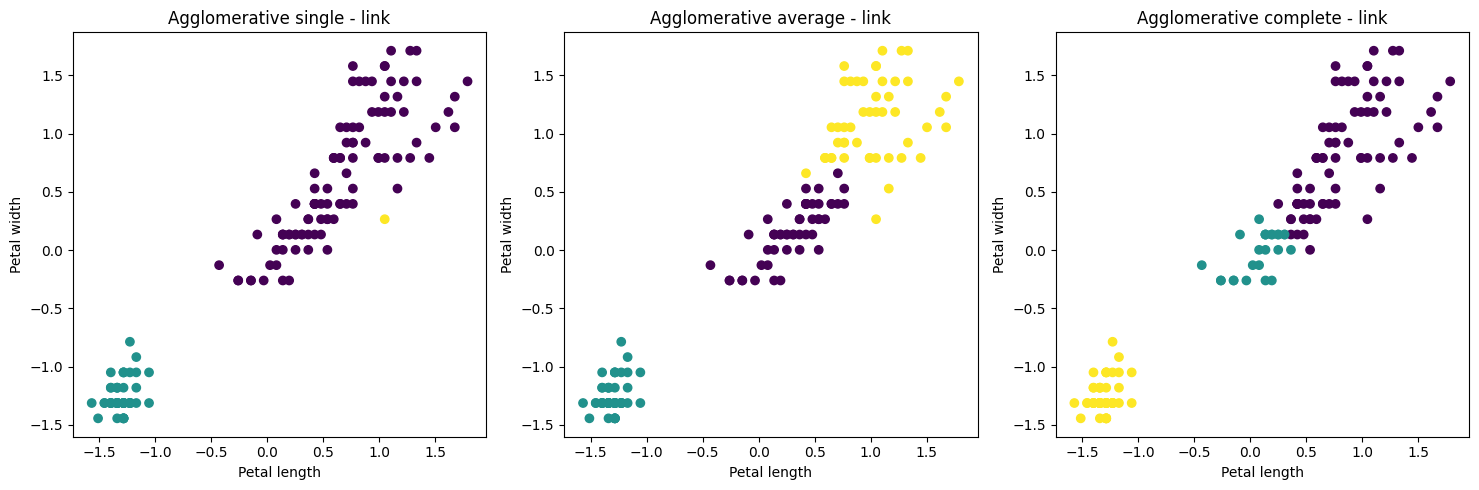

In [18]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

# show frequency of each type of flower
display(iris.groupby('Name').size())

# plot the correct assignment
plt.figure(figsize=(5,5))

# create one series per type of flower
for name, group in iris.groupby('Name'):
    plt.scatter(group['PetalLength'], group['PetalWidth'], label=name)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Ground Truth")
plt.legend()
plt.show()

# ***************************
# KMeans
# ***************************
estimator = KMeans(n_clusters=3)
estimator.fit(iris[['PetalLength', 'PetalWidth']])

# show the frequency of each type of flower in every cluster
display(iris.join(pd.Series(estimator.labels_, name="KMeans")).groupby(['Name', 'KMeans']).size())

# plot the clusters
plt.figure(figsize=(5,5))
plt.title("KMeans")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.scatter(iris['PetalLength'], iris['PetalWidth'], c=estimator.labels_)
plt.show()

# ***************************
# DBSCAN
# ***************************
estimator = DBSCAN()
estimator.fit(iris[['PetalLength', 'PetalWidth']])

# show the frequency of each type of flower in every cluster
display(iris.join(pd.Series(estimator.labels_, name="DBSCAN")).groupby(['Name', 'DBSCAN']).size())

# plot the clusters
plt.figure(figsize=(5,5))
plt.title("DBSCAN")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.scatter(iris['PetalLength'], iris['PetalWidth'], c=estimator.labels_)
plt.show()

# ***************************
# Agglomerative
# ***************************

# define the different linkage modes that we want to test
modes = ['single', 'average', 'complete']

# create a figure
plt.figure(figsize=(15,5))

# iterate over all linkage modes
for i, mode in enumerate(modes):
    estimator = AgglomerativeClustering(n_clusters=3, linkage=mode)
    estimator.fit(iris[['PetalLength', 'PetalWidth']])

    display(iris.join(pd.Series(estimator.labels_, name=mode)).groupby(['Name', mode]).size())

    # plot the clusters
    plt.subplot(1, 3, i+1)
    plt.tight_layout()
    plt.title('Agglomerative {} - link'.format(mode))
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.scatter(iris['PetalLength'], iris['PetalWidth'], c=estimator.labels_)

# show the plots
plt.show()


Answer: 

### 8.4. Clustering the Geo Data Set

#### 8.4.1. The geo data set (provided in ILIAS) contains the coordinates (x & y) of housings in a certain area. Have a look at the data and visualize it with a scatter plot, using the ```area``` feature as colour.

In [42]:
# read the dataset into a dataframe
geo = pd.read_csv('geo.csv')
# show the first few lines
display(geo.head())

geo = geo.drop(['Unnamed: 4'], axis = 1)
display(geo.head())

,id,x,y,area,Unnamed: 4
0,1,1,1,1,NaN
1,2,2,1,1,NaN
2,3,3,1,1,NaN
3,4,4,1,1,NaN
4,5,5,1,1,NaN


,id,x,y,area
0,1,1,1,1
1,2,2,1,1
2,3,3,1,1
3,4,4,1,1
4,5,5,1,1


In [47]:
geo.describe()

,id,x,y,area
count,75.000000,75.000000,75.000000,75.000000
mean,38.000000,5.706667,5.680000,1.906667
std,21.794495,2.971820,3.023154,0.661148
min,1.000000,1.000000,1.000000,1.000000
25%,19.500000,3.000000,3.000000,1.000000
50%,38.000000,6.000000,6.000000,2.000000
75%,56.500000,8.000000,8.000000,2.000000
max,75.000000,10.000000,10.000000,3.000000


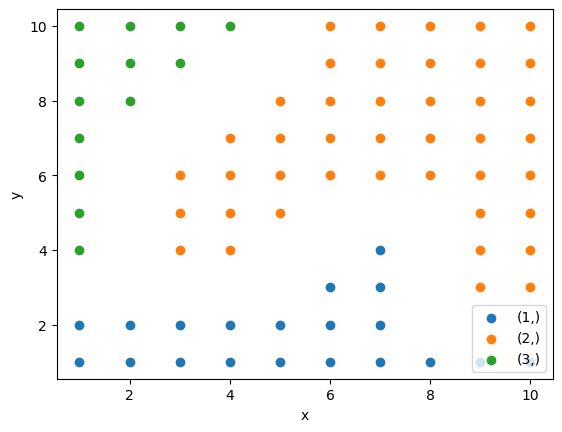

In [52]:
# create a scatter plot
for name, group in geo.groupby(['area']):
    plt.scatter(group['x'],group['y'],label = name)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show();

#### 8.4.2. Cluster the data using k-Means (k=3). Do the clusters represent the original areas?
We cluster the dataset and plot again, this time using the cluster ids as colour.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


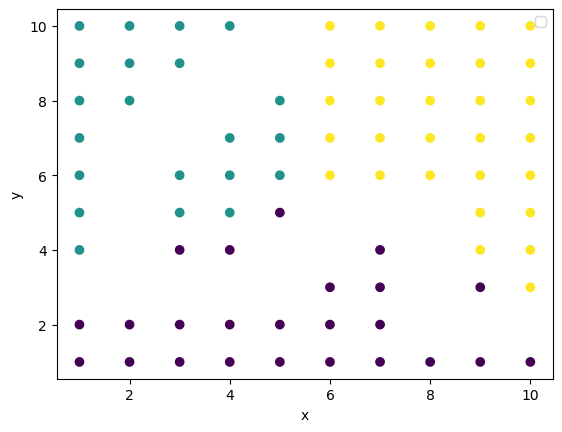

In [80]:
# create the clustering
estimator = KMeans(n_clusters=3, init='k-means++', random_state= 42)
cluster_ids = estimator.fit_predict(geo[['x','y']])
# plot again
plt.scatter(geo['x'],geo['y'],c = cluster_ids)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show();

Answer:

The K-Means clustering algorithm do not repersent the same clusters as the original. 

cluster 3 

#### 8.4.3. Apply DBSCAN and play around with the epsilon. Can you reproduce the original areas using this cluster algorithm?

We run DBSCAN in its default configuration first.
Then, we systematically test different parameter settings for ```min_samples``` and ```eps```.

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


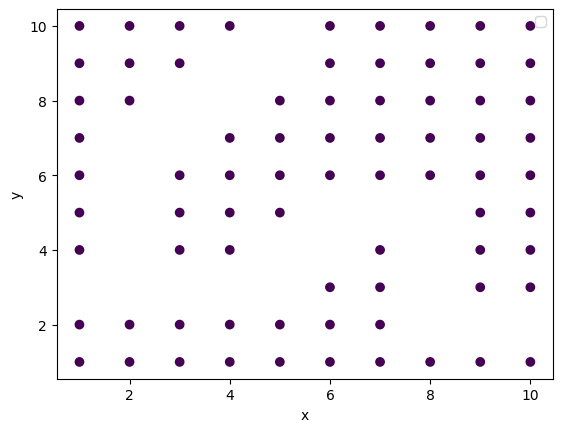

In [76]:
# show the result of running DBSCAN with default configuration
estimator = DBSCAN(eps = 0.5,   min_samples = 5)
cluster_ids = estimator.fit_predict(geo[['x','y']])
display(cluster_ids)

# test different parameter settings and plot the results
plt.scatter(geo['x'],geo['y'],c = cluster_ids)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show();

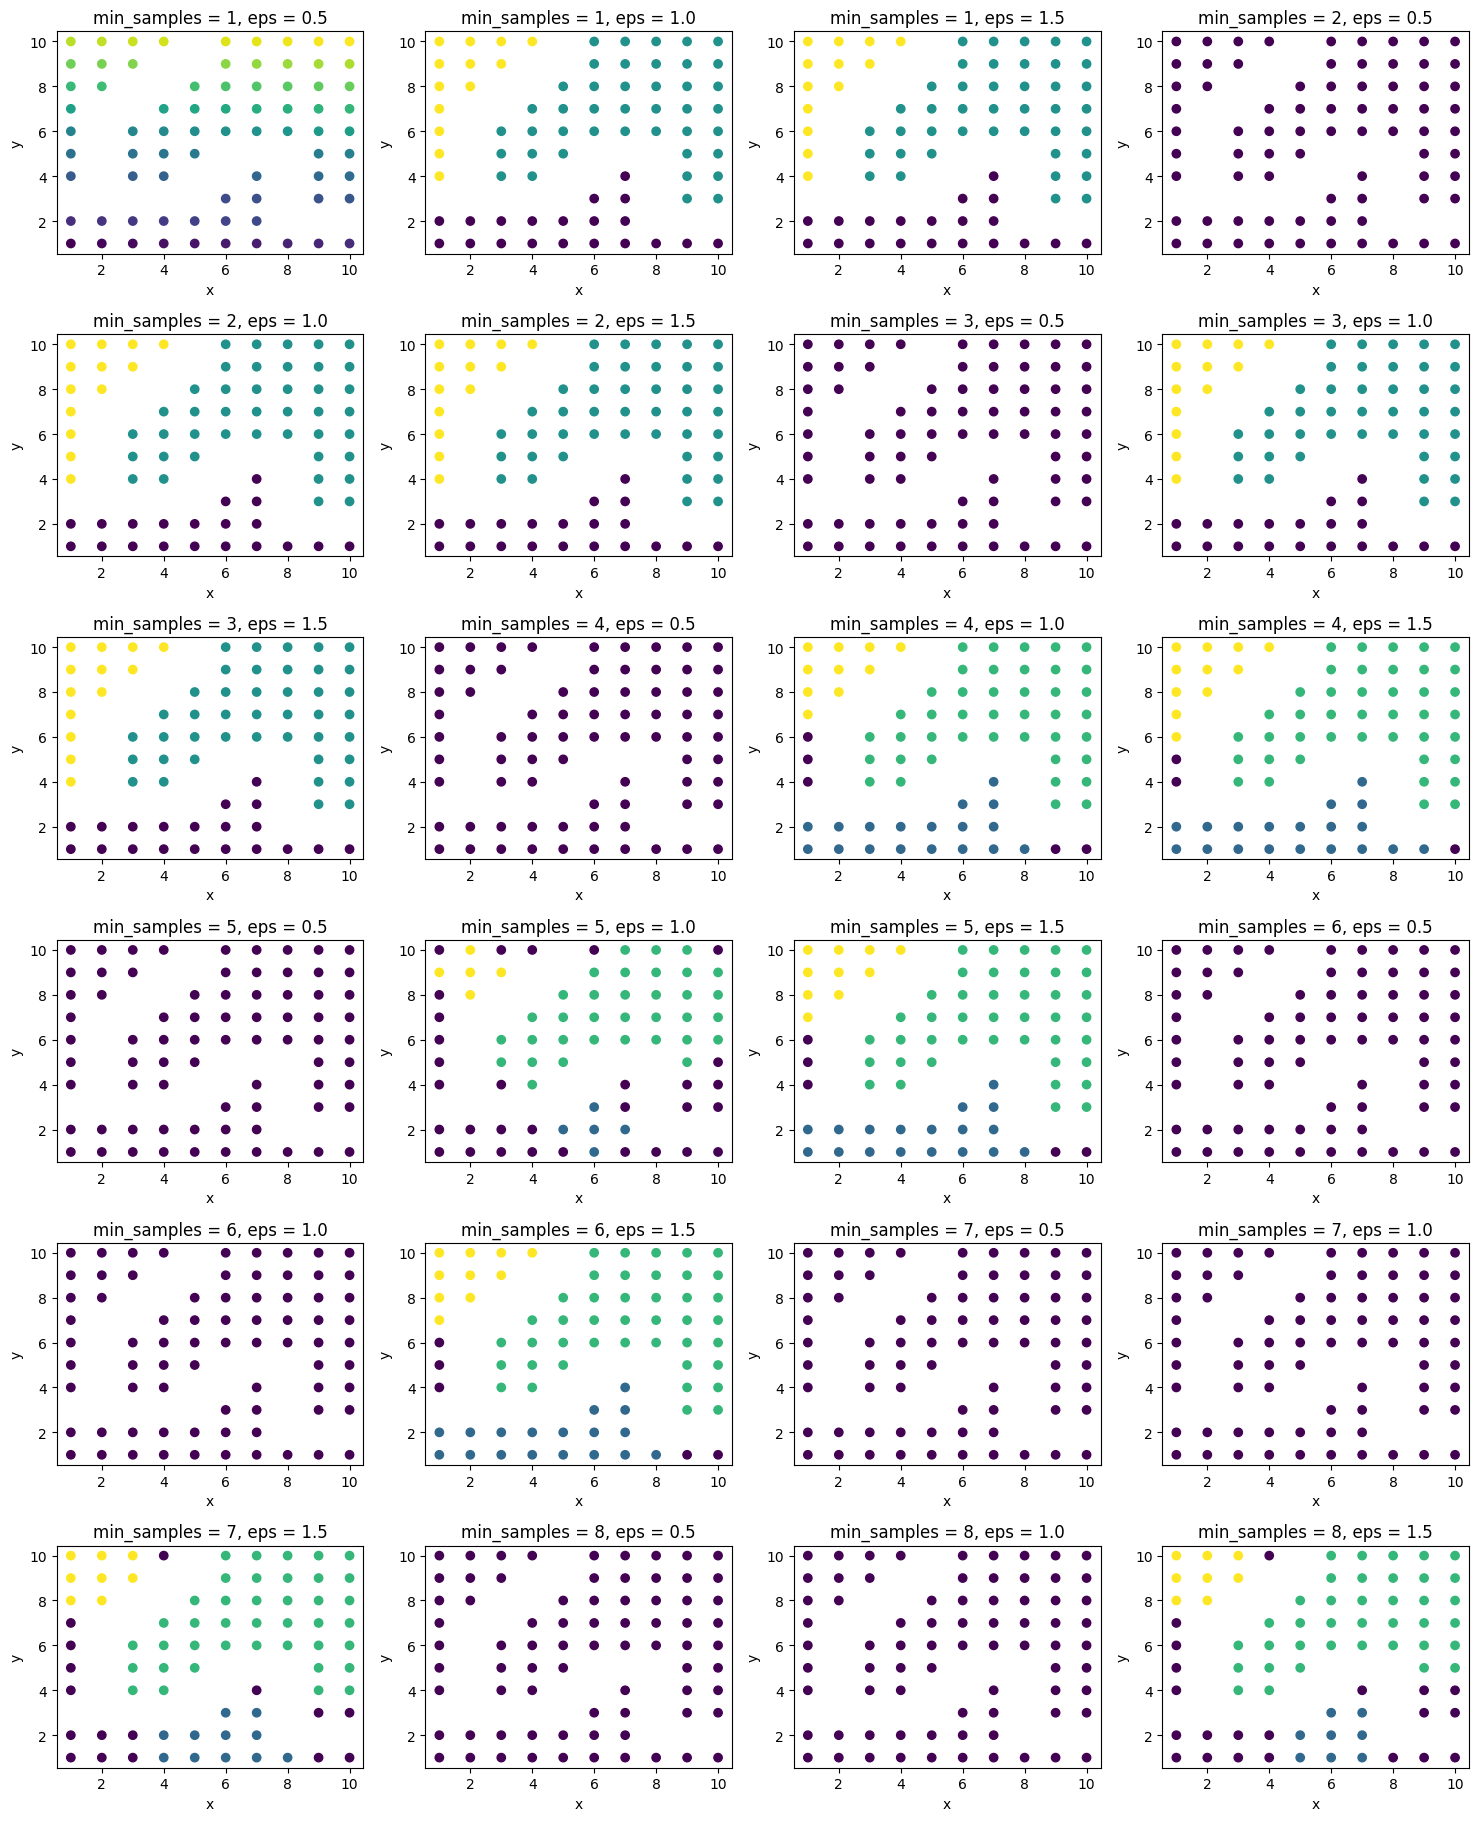

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

plt.figure(figsize=(15, 30))
count = 0
for i in range(1, 9):
    for j in np.arange(0.5, 2.0, 0.5):
        estimator = DBSCAN(eps=j, min_samples=i)
        cluster_ids = estimator.fit_predict(geo[['x', 'y']])
        count += 1
    
        # test different parameter settings and plot the results
        plt.subplot(10, 4, count)
        plt.title('min_samples = {}, eps = {}'.format(i, j))
        plt.tight_layout()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.scatter(geo['x'], geo['y'], c=cluster_ids)

plt.show()

    

Answer:

- The DBSCAN algorithm is a density estimation algoorithm and it struggles with different densities, setting smallert *eps* may result in merging small dense cluster into larger ones and splitting larger ones into smaller ones. 

- DBSCAN struggles with non-convex cluster structures. 

### 8.5. Clustering the Zoo Data Set
#### 8.5.1. The Zoo data set describes 101 animals using 18 different attributes. The data set is provided in ILIAS as an ARFF file. Load this dataset.

In [146]:
# import arff
from scipy.io import arff

# load the file and create a dataframe
zoo_arff_data, zoo_arff_meta = arff.loadarff('zoo.arff')
zoo_data = pd.DataFrame(zoo_arff_data)

# solve the encoding issue in the data
columns_with_binary_strings = zoo_data.select_dtypes('object').columns.values
zoo_data[columns_with_binary_strings] = zoo_data[columns_with_binary_strings].apply(lambda x: x.str.decode("utf-8"))

display(zoo_data.head())
display(zoo_data.shape)

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,true,false,false,true,false,false,true,true,true,true,false,false,4.0,false,false,true,mammal
1,antelope,true,false,false,true,false,false,false,true,true,true,false,false,4.0,true,false,true,mammal
2,bass,false,false,true,false,false,true,true,true,true,false,false,true,0.0,true,false,false,fish
3,bear,true,false,false,true,false,false,true,true,true,true,false,false,4.0,false,false,true,mammal
4,boar,true,false,false,true,false,false,true,true,true,true,false,false,4.0,true,false,true,mammal


(101, 18)

#### 8.5.2. Cluster the data set using Agglomerative Hierarchical Clustering. Experiment with different parameter settings in order to generate a nice species tree.

We first have to encode the non-numerical features. Note that the ```type``` feature already contains a classification of the species, so we exclude it and use it to see if our results make sense.

In [192]:
# import preprocessing from sklean
from sklearn import preprocessing

# specify which attributes you want to use
selected_data = zoo_data[['hair','feathers','eggs','milk','aquatic','predator','toothed','backbone','breathes','venomous','fins','domestic','catsize']]
display(selected_data.head())

# create the encoder
encoder= preprocessing.OrdinalEncoder()  # Use sparse=False to get a dense array, drop='first' to handle multicollinearity

# encode the selected attributes
encoded_data = encoder.fit_transform(selected_data)

# show the result
display(encoded_data)

,hair,feathers,eggs,milk,aquatic,predator,toothed,backbone,breathes,venomous,fins,domestic,catsize
0,true,false,false,true,false,true,true,true,true,false,false,false,true
1,true,false,false,true,false,false,true,true,true,false,false,false,true
2,false,false,true,false,true,true,true,true,false,false,true,false,false
3,true,false,false,true,false,true,true,true,true,false,false,false,true
4,true,false,false,true,false,true,true,true,true,false,false,false,true


array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

Then we can create a clustering and look at the dendrogram.

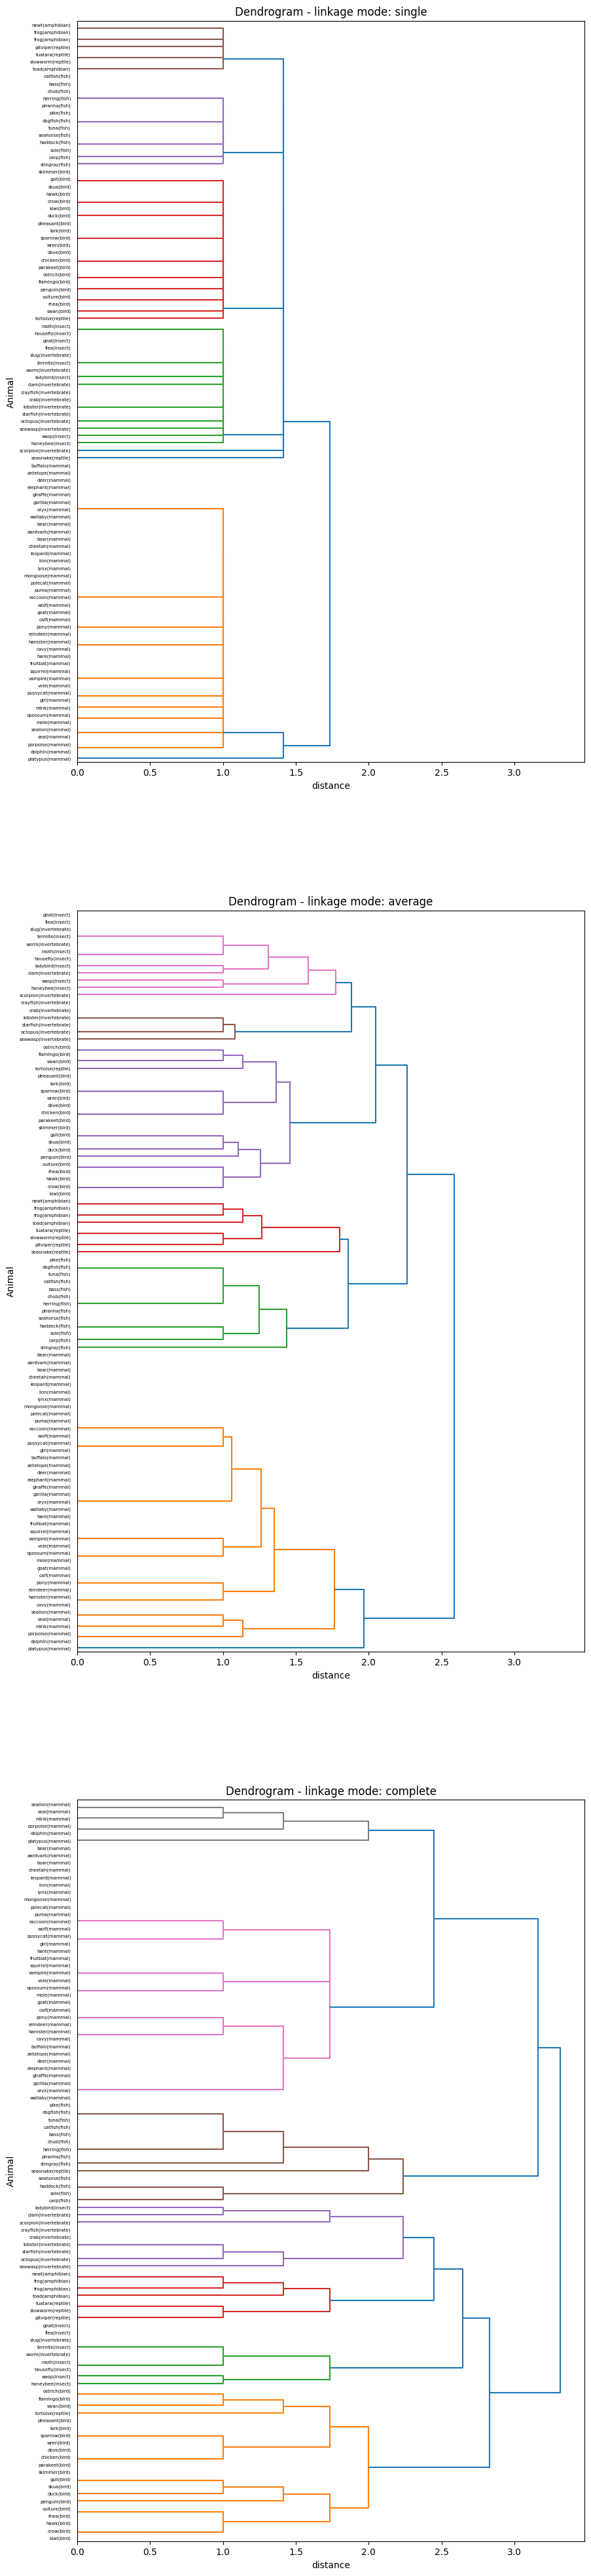

In [194]:
# create the clustering
from scipy.cluster.hierarchy import dendrogram
 
# Z = linkage(encoded_data,'single')

# plot the dendrogram

# define the different linkage modes that we want to test
modes = ['single', 'average', 'complete']

# create a figure
plt.figure(figsize=(10,50))
x_axis = None

# iterate over all linkage modes
for i, mode in enumerate(modes):
    
    # add a subplot 
    x_axis = plt.subplot(3,1,i + 1, sharex = x_axis)
    
    # setup the labels
    plt.title('Dendrogram - linkage mode: {}'.format(mode))
    plt.xlabel('distance')
    plt.ylabel('Animal')
    
    # create the clustering
    Z = linkage(encoded_data,mode)
    
    # plot the dendrogram
    dendrogram(Z,labels = list(zoo_data['animal'].values +  "("+zoo_data['type'].values +")"), orientation='right',leaf_font_size= 5)

    
# show the plots
plt.show()
